# 📊 Simple OTT Streaming Analysis

Welcome! This is a simple analysis of Netflix and Hulu to understand which platform is performing better.

## What we'll look at:
- **Revenue**: How much money each platform makes
- **Subscribers**: How many people use each platform  
- **Growth**: Which platform is growing faster
- **Key Findings**: Simple insights you can understand

Let's dive in and see what the data tells us! ?

In [30]:
# Import the basic libraries we need
import pandas as pd  # For working with data
import matplotlib.pyplot as plt  # For making charts
import numpy as np  # For calculations
import warnings
warnings.filterwarnings('ignore')  # Hide warning messages

# Database connection
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import os
from dotenv import load_dotenv

# Load database settings
load_dotenv()

# Set up nice chart style
plt.style.use('default')

print("✅ Libraries loaded successfully!")
print("Ready to analyze Netflix vs Hulu data...")

✅ Libraries loaded successfully!
Ready to analyze Netflix vs Hulu data...


In [31]:
# Connect to database and load data
def connect_to_database():
    """Simple function to connect to our database"""
    DB_HOST = os.getenv('DB_HOST', 'localhost')
    DB_PORT = int(os.getenv('DB_PORT', 3306))
    DB_USER = os.getenv('DB_USER', 'root')
    DB_PASSWORD = os.getenv('DB_PASSWORD', '')
    DB_NAME = os.getenv('DB_NAME', 'ott_analytics')
    
    DATABASE_URL = f"mysql+pymysql://{DB_USER}:{quote_plus(DB_PASSWORD)}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
    
    try:
        engine = create_engine(DATABASE_URL)
        print("✅ Connected to database successfully!")
        return engine
    except Exception as e:
        print(f"❌ Database connection failed: {e}")
        return None

# Connect and load the data we need
engine = connect_to_database()

print("\n📊 Loading Netflix and Hulu data...")

# Load Netflix data
netflix_revenue = pd.read_sql("SELECT * FROM netflix_revenue", engine)
netflix_subscribers = pd.read_sql("SELECT * FROM netflix_numsubscribers", engine)

# Load Hulu data  
hulu_revenue = pd.read_sql("SELECT * FROM hulu_revenue", engine)
hulu_subscribers = pd.read_sql("SELECT * FROM hulu_numsubscribers", engine)

print("✅ Data loaded successfully!")
print(f"📈 Netflix: {len(netflix_revenue)} years of revenue data, {len(netflix_subscribers)} years of subscriber data")
print(f"🟢 Hulu: {len(hulu_revenue)} years of revenue data, {len(hulu_subscribers)} years of subscriber data")

✅ Connected to database successfully!

📊 Loading Netflix and Hulu data...
✅ Data loaded successfully!
📈 Netflix: 10 years of revenue data, 10 years of subscriber data
🟢 Hulu: 11 years of revenue data, 11 years of subscriber data


## 💰 Revenue Analysis - Who Makes More Money?

Let's see how much money Netflix and Hulu make each year and which one is earning more.

💰 Analyzing Revenue Data...


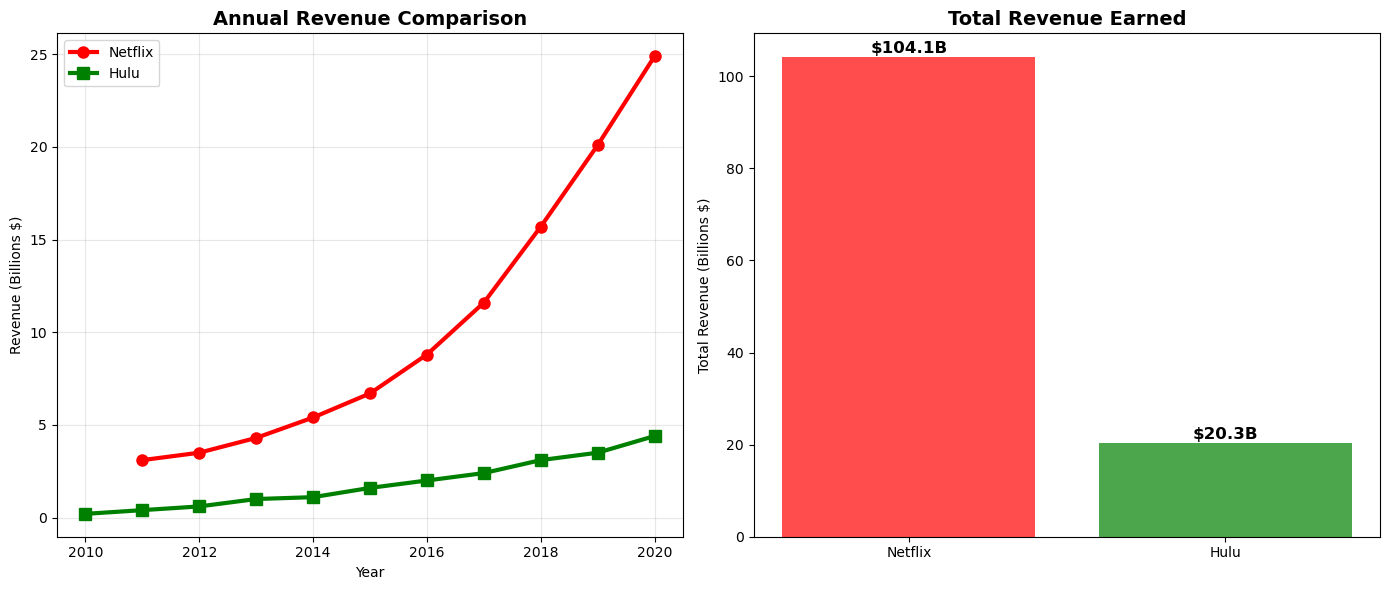


📊 KEY REVENUE FINDINGS:
💰 Netflix Total Revenue: $104.1 Billion
💰 Hulu Total Revenue: $20.3 Billion
🏆 Netflix makes 5.1x more revenue than Hulu

📈 Latest Year Revenue:
   Netflix: $24.9B
   Hulu: $4.4B


In [32]:
# Simple Revenue Analysis
print("💰 Analyzing Revenue Data...")

# Create a simple side-by-side chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Revenue over time
ax1.plot(netflix_revenue['Year'], netflix_revenue['Revenue'], 
         marker='o', linewidth=3, color='red', label='Netflix', markersize=8)
ax1.plot(hulu_revenue['Year'], hulu_revenue['Revenue'], 
         marker='s', linewidth=3, color='green', label='Hulu', markersize=8)

ax1.set_title('Annual Revenue Comparison', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue (Billions $)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Chart 2: Total revenue comparison
total_netflix = netflix_revenue['Revenue'].sum()
total_hulu = hulu_revenue['Revenue'].sum()

platforms = ['Netflix', 'Hulu']
totals = [total_netflix, total_hulu]
colors = ['red', 'green']

bars = ax2.bar(platforms, totals, color=colors, alpha=0.7)
ax2.set_title('Total Revenue Earned', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total Revenue (Billions $)')

# Add values on top of bars
for bar, total in zip(bars, totals):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'${total:.1f}B', ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Print key numbers
print("\n📊 KEY REVENUE FINDINGS:")
print(f"💰 Netflix Total Revenue: ${total_netflix:.1f} Billion")
print(f"💰 Hulu Total Revenue: ${total_hulu:.1f} Billion")
print(f"🏆 Netflix makes {(total_netflix/total_hulu):.1f}x more revenue than Hulu")

# Latest year revenue
latest_netflix = netflix_revenue.iloc[-1]['Revenue']
latest_hulu = hulu_revenue.iloc[-1]['Revenue']
print(f"\n📈 Latest Year Revenue:")
print(f"   Netflix: ${latest_netflix:.1f}B")
print(f"   Hulu: ${latest_hulu:.1f}B")

## 👥 Subscriber Analysis - Who Has More Users?

Now let's look at how many people actually use Netflix vs Hulu and see which platform people prefer.

👥 Analyzing Subscriber Data...


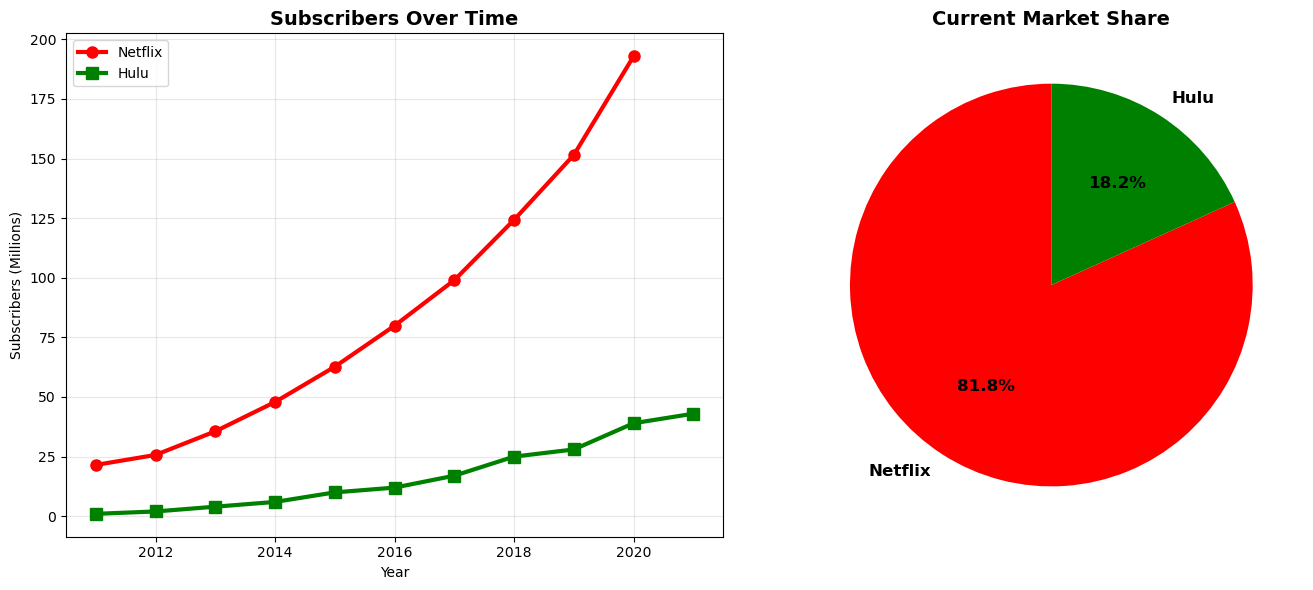


📊 KEY SUBSCRIBER FINDINGS:
👥 Netflix Current Subscribers: 192.9 Million
👥 Hulu Current Subscribers: 43.0 Million
🏆 Netflix has 4.5x more subscribers than Hulu

📈 Overall Growth Since Start:
   Netflix: 797% growth
   Hulu: 4200% growth


In [33]:
# Simple Subscriber Analysis
print("👥 Analyzing Subscriber Data...")

# Create a simple chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Subscribers over time
ax1.plot(netflix_subscribers['Year'], netflix_subscribers['Subscribers'], 
         marker='o', linewidth=3, color='red', label='Netflix', markersize=8)
ax1.plot(hulu_subscribers['Year'], hulu_subscribers['Subscribers'], 
         marker='s', linewidth=3, color='green', label='Hulu', markersize=8)

ax1.set_title('Subscribers Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Subscribers (Millions)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Chart 2: Current subscriber comparison (pie chart)
current_netflix = netflix_subscribers.iloc[-1]['Subscribers']
current_hulu = hulu_subscribers.iloc[-1]['Subscribers']

sizes = [current_netflix, current_hulu]
labels = ['Netflix', 'Hulu']
colors = ['red', 'green']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Current Market Share', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print key numbers
print("\n📊 KEY SUBSCRIBER FINDINGS:")
print(f"👥 Netflix Current Subscribers: {current_netflix:.1f} Million")
print(f"👥 Hulu Current Subscribers: {current_hulu:.1f} Million")
print(f"🏆 Netflix has {(current_netflix/current_hulu):.1f}x more subscribers than Hulu")

# Calculate growth rates (simple)
netflix_growth = ((netflix_subscribers.iloc[-1]['Subscribers'] / netflix_subscribers.iloc[0]['Subscribers']) - 1) * 100
hulu_growth = ((hulu_subscribers.iloc[-1]['Subscribers'] / hulu_subscribers.iloc[0]['Subscribers']) - 1) * 100

print(f"\n📈 Overall Growth Since Start:")
print(f"   Netflix: {netflix_growth:.0f}% growth")
print(f"   Hulu: {hulu_growth:.0f}% growth")

## ? Summary - What We Learned

Let's summarize our simple analysis with the key takeaways that are easy to understand.

In [34]:
# Final Summary Analysis
print("📋 FINAL SUMMARY - Netflix vs Hulu")
print("=" * 50)

# Revenue Summary
total_netflix_rev = netflix_revenue['Revenue'].sum()
total_hulu_rev = hulu_revenue['Revenue'].sum()
latest_netflix_rev = netflix_revenue.iloc[-1]['Revenue']
latest_hulu_rev = hulu_revenue.iloc[-1]['Revenue']

# Subscriber Summary  
current_netflix_subs = netflix_subscribers.iloc[-1]['Subscribers']
current_hulu_subs = hulu_subscribers.iloc[-1]['Subscribers']

print("\n💰 REVENUE WINNER:")
if total_netflix_rev > total_hulu_rev:
    print(f"🏆 Netflix WINS with ${total_netflix_rev:.1f}B total revenue")
    print(f"   Hulu has ${total_hulu_rev:.1f}B total revenue")
    print(f"   Netflix makes {(total_netflix_rev/total_hulu_rev):.1f}x more money")
else:
    print(f"🏆 Hulu WINS with ${total_hulu_rev:.1f}B total revenue")

print("\n👥 SUBSCRIBER WINNER:")
if current_netflix_subs > current_hulu_subs:
    print(f"🏆 Netflix WINS with {current_netflix_subs:.1f}M subscribers")
    print(f"   Hulu has {current_hulu_subs:.1f}M subscribers")
    print(f"   Netflix has {(current_netflix_subs/current_hulu_subs):.1f}x more users")
else:
    print(f"🏆 Hulu WINS with {current_hulu_subs:.1f}M subscribers")

# Simple conclusion
print("\n🎯 SIMPLE CONCLUSION:")
if total_netflix_rev > total_hulu_rev and current_netflix_subs > current_hulu_subs:
    print("✅ Netflix is the clear winner in both revenue and subscribers")
    print("✅ Netflix is the dominant streaming platform")
else:
    print("⚡ The competition is closer than expected!")

print("\n📊 KEY NUMBERS TO REMEMBER:")
print(f"• Netflix: ${latest_netflix_rev:.1f}B revenue, {current_netflix_subs:.1f}M subscribers")
print(f"• Hulu: ${latest_hulu_rev:.1f}B revenue, {current_hulu_subs:.1f}M subscribers")

print("\n✨ Analysis Complete! Thanks for following along!")

📋 FINAL SUMMARY - Netflix vs Hulu

💰 REVENUE WINNER:
🏆 Netflix WINS with $104.1B total revenue
   Hulu has $20.3B total revenue
   Netflix makes 5.1x more money

👥 SUBSCRIBER WINNER:
🏆 Netflix WINS with 192.9M subscribers
   Hulu has 43.0M subscribers
   Netflix has 4.5x more users

🎯 SIMPLE CONCLUSION:
✅ Netflix is the clear winner in both revenue and subscribers
✅ Netflix is the dominant streaming platform

📊 KEY NUMBERS TO REMEMBER:
• Netflix: $24.9B revenue, 192.9M subscribers
• Hulu: $4.4B revenue, 43.0M subscribers

✨ Analysis Complete! Thanks for following along!
